
<b><font color='blue'>AI-PRO Spark Team ITI</font></b>

## Objective:
- The objective from this project is to create a <b>Logistic Regression Classifier</b> to predict the <b>Stroke Condition</b>.
- <b>Stoke</b> is a condition in which either the blood flow to the brain stops or blood flow is excessive.
- It is required to obtain <b>ROC > 0.65</b>.

### Data:
- Data is provided in csv format in a file named <b>healthcare-dataset-stroke-data.csv</b>

### Column names and data types are as follow:
- id, integer.
- gender, string.
- age, double.
- hypertension, integer.
- heart_disease, integer.
- ever_married, string.
- work_type, string.
- Residence_type, string.
- avg_glucose_level, double.
- bmi, double.
- smoking_status, string.
- stroke, integer <b>(Target Label)</b>.
If the person has stroke the stroke label value is <b>"1"</b> otherwise <b>"0"</b>.

## To perform this task follow the following guiding steps:

In [ ]:
pip install pyspark

### Create a spark session and import the required libraries

In [ ]:

import pyspark

from pyspark.sql import SparkSession 

from pyspark.sql.functions import col,isnan,when,count,mean,when
import pyspark.sql.functions as F


#from pyspark.sql.functions import *
from pyspark.sql.types import StructType,StructField, IntegerType, StringType,DoubleType





In [ ]:
spark = SparkSession.builder.appName("Stroke").getOrCreate()

### Create a data schema programatically

In [ ]:
Myschema=StructType([
                      StructField('id',IntegerType(),True),
                      StructField('gender',StringType(),True),
                      StructField('age',DoubleType(),True),
                      StructField('hypertension',IntegerType(),True),
                      StructField('heart_disease',IntegerType(),True),
                      StructField('ever_married',StringType(),True),
                      StructField('work_type',StringType(),True),
                      StructField('Residence_type',StringType(),True),
                      StructField('avg_glucose_level',DoubleType(),True),
                      StructField('bmi',DoubleType(),True),
                      StructField('smoking_status',StringType(),True),
                      StructField('stroke',IntegerType(),True),




])


### Read the data using the standard DataReader (Key,Value) pairs format


In [ ]:
df=spark.read.csv("/content/healthcare-dataset-stroke-data.csv", header=True,schema=Myschema)

### Explore the data 

- Print the Schema.
- Show the first 10 rows from the data.
- Explore null values and show how many null values in each column.
- Plot a count plot for the target label and <b>notice the graph</b>.
- Perform any additional EDA you find useful.

In [ ]:
#the schema
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [ ]:
#Show the first 10 rows from the data.
df.show(10)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

In [ ]:
df.count()

5110

In [ ]:
null_columns = []
for col_name in df.columns:
    null_values = df.where(F.col(col_name).isNull()).count()
    if(null_values > 0):
        null_columns.append((col_name, null_values))
print(null_columns)

[('bmi', 201)]


In [ ]:
#the null counts of each coulmn containg null values
spark.createDataFrame(null_columns, ['column', 'missing_value']).show()

+------+-------------+
|column|missing_value|
+------+-------------+
|   bmi|          201|
+------+-------------+



In [ ]:
df.toPandas()['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Text(0, 0.5, 'count')

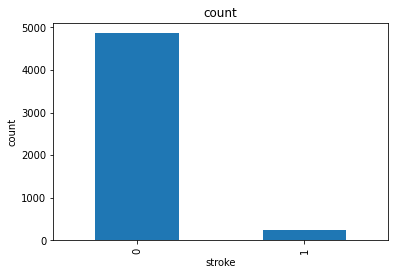

In [ ]:
#from the graph we notice that the target label is biased and that's bad for the model

ax = df.toPandas()['stroke'].value_counts().plot(kind='bar',title="count")
ax.set_xlabel("stroke")
ax.set_ylabel("count")

In [ ]:
df.count()

5110

### Get the summary statistics of the age column
- You will find the minimum age is about <b>0.08</b>.
- Remove rows for the age below <b>2 years old</b>.

In [ ]:
df.select('age').summary().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              5110|
|   mean|43.226614481409015|
| stddev| 22.61264672311348|
|    min|              0.08|
|    25%|              25.0|
|    50%|              45.0|
|    75%|              61.0|
|    max|              82.0|
+-------+------------------+



In [ ]:
#removed below two years old
df = df.filter('age >= 2')

In [ ]:
df.select('age').summary().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              4990|
|   mean| 44.23907815631262|
| stddev|21.908077881917443|
|    min|               2.0|
|    25%|              27.0|
|    50%|              45.0|
|    75%|              61.0|
|    max|              82.0|
+-------+------------------+



### Working with gender & smoking_status columns:
- Select and show the gender & smoking_status columns
- Get the distinct values for each column.

In [ ]:
df.select('gender','smoking_status').show()

+------+---------------+
|gender| smoking_status|
+------+---------------+
|  Male|formerly smoked|
|Female|   never smoked|
|  Male|   never smoked|
|Female|         smokes|
|Female|   never smoked|
|  Male|formerly smoked|
|  Male|   never smoked|
|Female|   never smoked|
|Female|        Unknown|
|Female|        Unknown|
|Female|   never smoked|
|Female|         smokes|
|Female|         smokes|
|  Male|        Unknown|
|Female|   never smoked|
|Female|   never smoked|
|  Male|         smokes|
|  Male|         smokes|
|Female|   never smoked|
|  Male|        Unknown|
+------+---------------+
only showing top 20 rows



In [ ]:
df.select('gender').distinct().show()

+------+
|gender|
+------+
|Female|
| Other|
|  Male|
+------+



In [ ]:
df.select('smoking_status').distinct().show()

+---------------+
| smoking_status|
+---------------+
|         smokes|
|        Unknown|
|   never smoked|
|formerly smoked|
+---------------+



#### Change the string values of the columns into numerical values as follow:
1. Gender column:
    * Male = 1 
    * Female = 0 
    * Other = 0 
2. Smoking Status column:
  * never smoked = 0
  * Unknown = 0.5
  * formerly smoked = 0.75
  * smokes = 1.0


In [ ]:
from pyspark.sql.functions import col, when
 
# map gender with its number

df=df.withColumn("gender",
                     when(col("gender")=='Male', 1)
                     .when(col("gender")=='Female', 0)
                     .when(col("gender")=='other', 0))

In [ ]:
df=df.withColumn("smoking_status",
                     when(col("smoking_status")=='never smoked', 0)
                     .when(col("smoking_status")=='Unknown', 0.5)
                     .when(col("smoking_status")=='formerly smoked', 0.75)
                    .when(col("smoking_status")=='smokes', 1.0)
              )

#### Show the output DataFrame
- Select and show the gender & smoking_status columns after value changing.
- Print schema for the new dataframe.

In [ ]:
df.select('gender','smoking_status').show()

+------+--------------+
|gender|smoking_status|
+------+--------------+
|     1|          0.75|
|     0|           0.0|
|     1|           0.0|
|     0|           1.0|
|     0|           0.0|
|     1|          0.75|
|     1|           0.0|
|     0|           0.0|
|     0|           0.5|
|     0|           0.5|
|     0|           0.0|
|     0|           1.0|
|     0|           1.0|
|     1|           0.5|
|     0|           0.0|
|     0|           0.0|
|     1|           1.0|
|     1|           1.0|
|     0|           0.0|
|     1|           0.5|
+------+--------------+
only showing top 20 rows



In [ ]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = true)
 |-- stroke: integer (nullable = true)



### Deal with null value according to your data analysis.

In [ ]:
# Remove records with missing values in any column and get the number of remaining rows
df_none_missing = df.dropna()

In [ ]:
print(df_none_missing.count())

4794


In [ ]:
#Note: Since the number of rows are still very large so I will choose to remove all rows containing NULLS before entering the data to the model 

In [ ]:
df.count()

4990

### Split the data into training and test dataframes:
- Save each dataframe as a parquet file

In [ ]:
# Split into training and testing sets in a 80:20 ratio
df_train, df_test = df_none_missing.randomSplit([0.8,0.2], seed=42)

# Check that training set has around 80% of records
training_ratio = df_train.count() / df_none_missing.count()
print(training_ratio)


0.8085106382978723


In [ ]:
df_train.write.parquet("/content/train.parquet") 
df_test.write.parquet("/content/test.parquet") 


### Read the saved Train and Test DataFrame:
- Use the dataframes you read in the subsequent steps.

In [ ]:
train_df=spark.read.parquet("/content/train.parquet")
test_df=spark.read.parquet("/content/test.parquet")

### Create the model:
- Perform feature engineering steps.
- Create the logistic regression classifier.
- Build the pipeline model that uses all feature engineering steps and the model.
- Train the pipeline model using the trainig dataset.

In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler,OneHotEncoder
from pyspark.ml import Pipeline

In [ ]:
train_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = true)
 |-- stroke: integer (nullable = true)



In [ ]:
categoricalCols = ['ever_married','work_type','Residence_type']

indexOutputCols = [x + "_Index" for x in categoricalCols]

stringIndexer = StringIndexer(inputCols=categoricalCols,
                             outputCols=indexOutputCols,
                             handleInvalid='skip')


In [ ]:
oheOutputCols = [x + "_OHE" for x in categoricalCols]
oheEncoder = OneHotEncoder(inputCols=indexOutputCols,
                          outputCols=oheOutputCols)


In [ ]:
numericCols = [field for (field,dataType) in train_df.dtypes
              if ((dataType=='double')& (field!='stroke'))]
numericCols.append("gender")
numericCols.append("hypertension")
numericCols.append("heart_disease")

numericCols

['age',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'gender',
 'hypertension',
 'heart_disease']

In [ ]:
assemblerInputs = oheOutputCols + numericCols
assemblerInputs

['ever_married_OHE',
 'work_type_OHE',
 'Residence_type_OHE',
 'age',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'gender',
 'hypertension',
 'heart_disease']

In [ ]:
from pyspark.ml.feature import VectorAssembler
vecAssembler = VectorAssembler(inputCols=assemblerInputs,outputCol='features')

In [ ]:
# Import LogisticRegression
from pyspark.ml.classification import LogisticRegression

# Create a LogisticRegression Estimator
lr = LogisticRegression(labelCol='stroke',featuresCol='features')


In [ ]:
# Building the pipeline
from pyspark.ml import Pipeline


pipeline =Pipeline(stages = [stringIndexer,oheEncoder,vecAssembler,lr])
pipelineModel = pipeline.fit(train_df)

### Perform predictions on tests dataframe:
- Test the model using the test dataframe
- Select and show the feature column.
- Print the schema of the output dataframe.
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   

In [ ]:
PredDF=pipelineModel.transform(test_df)

In [ ]:
	PredDF.select("features").show(truncate=False)

+---------------------------------------------------------+
|features                                                 |
+---------------------------------------------------------+
|(13,[1,5,6,7,8],[1.0,1.0,42.0,98.53,18.5])               |
|(13,[1,6,7,8,9],[1.0,20.0,94.67,28.8,0.5])               |
|(13,[0,1,6,7,8,9],[1.0,1.0,43.0,88.23,37.6,0.5])         |
|(13,[0,1,5,6,7,8,10],[1.0,1.0,1.0,79.0,198.79,24.9,1.0]) |
|(13,[0,1,5,6,7,8,9],[1.0,1.0,1.0,58.0,105.74,26.8,0.75]) |
|(13,[0,3,5,6,7,8,9],[1.0,1.0,1.0,37.0,72.09,24.1,1.0])   |
|(13,[4,6,7,8,9],[1.0,3.0,94.12,21.4,0.5])                |
|(13,[4,6,7,8,9],[1.0,14.0,92.22,22.8,0.5])               |
|(13,[3,6,7,8],[1.0,39.0,87.33,34.3])                     |
|(13,[4,6,7,8,9],[1.0,5.0,75.1,20.7,0.5])                 |
|(13,[0,2,5,6,7,8,9],[1.0,1.0,1.0,74.0,68.18,27.3,0.75])  |
|(13,[1,6,7,8],[1.0,16.0,87.54,37.8])                     |
|(13,[0,1,5,6,7,8,10],[1.0,1.0,1.0,34.0,83.75,37.0,1.0])  |
|(13,[4,6,7,8,9,10],[1.0,3.0,65.85,17.0,

In [ ]:
PredDF.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = true)
 |-- stroke: integer (nullable = true)
 |-- ever_married_Index: double (nullable = false)
 |-- work_type_Index: double (nullable = false)
 |-- Residence_type_Index: double (nullable = false)
 |-- ever_married_OHE: vector (nullable = true)
 |-- work_type_OHE: vector (nullable = true)
 |-- Residence_type_OHE: vector (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [ ]:
PredDF.select('stroke','prediction').show()

+------+----------+
|stroke|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
+------+----------+
only showing top 20 rows



In [ ]:
PredDF.select('stroke','prediction').where("stroke=1").show()

+------+----------+
|stroke|prediction|
+------+----------+
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
+------+----------+
only showing top 20 rows



In [ ]:
PredDF.toPandas()['prediction'].value_counts()

0.0    918
Name: prediction, dtype: int64

### Evaluate the model performance
- Use <b>BinaryClassificationEvaluator</b>. This will calculate the <b>ROC</b>.
- Set the parameters as follow:
    - <b>rawPredictionCol='prediction'</b> and <b>labelCol='stroke'</b>

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
evaluatorROC = BinaryClassificationEvaluator(rawPredictionCol='prediction'
                                             ,labelCol='stroke')

In [ ]:

evaluatorROC.evaluate(PredDF)

0.5

### Improve Model Performance
- You may noticed that <b>the target label is imbalanced</b>.
- LogisticRegression classifier has a special parameter <b>weightCol</b> to deal with imbalanced class.
- In order to use this parameter you must have a <b>weightCol</b> in your training dataframe.
- In order to create this column you will need to define a <b>UDF</b> and apply it to the target label column.
- Create a LogisticRegression classifier with <b>weightCol</b> parameter.
- Build and train a pipeline model with the new LogisticRegression.
- Perform the prediction on the test dataframe. 
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   
- Evaluate the model performance exactly as in the previous step.
### YOU SHOULD OBTAIN  ROC > 0.65
<BR>
<b><font color='red'>Note: feel free to deal with the imbalanced cluster with the above method or another. However, you can only use methods applied on SPARK DATAFRAME</font></b>

In [ ]:
# Import LogisticRegression
from pyspark.ml.classification import LogisticRegression

# define class weights
w = {0:1, 1:99}
# Create a LogisticRegression Estimator
lr = LogisticRegression(labelCol='stroke',featuresCol='features',weightCol="newWeight")

In [ ]:
from pyspark.sql.functions import *
def create(stro):
    if stro == 1:
        return 99
    else : 
        return 1
    
udf1=udf(lambda a:create(a))

In [ ]:
train_df=train_df.withColumn('newWeight', udf1("stroke"))
train_df.show()

+---+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+---------+
| id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|newWeight|
+---+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+---------+
| 77|     0|13.0|           0|            0|          No|     children|         Rural|            85.81|18.6|           0.5|     0|        1|
| 84|     1|55.0|           0|            0|         Yes|      Private|         Urban|            89.17|31.5|           0.0|     0|        1|
| 99|     0|31.0|           0|            0|          No|      Private|         Urban|           108.89|52.3|           0.5|     0|        1|
|129|     0|24.0|           0|            0|          No|      Private|         Urban|            97.55|26.2|           0.0|     0|        1|
|156| 

In [ ]:
train_df = train_df.withColumn("newWeight", train_df["newWeight"].cast(IntegerType()))


In [ ]:
# Building the pipeline
from pyspark.ml import Pipeline


pipeline =Pipeline(stages = [stringIndexer,oheEncoder,vecAssembler,lr])
pipelineModel = pipeline.fit(train_df)

In [ ]:
PredDF2=pipelineModel.transform(test_df)

In [ ]:
evaluatorROC.evaluate(PredDF2)

0.7295918367346939

# GOOD LUCK
<b><font color='GREEN'>AI-PRO Spark Team ITI</font></b>